In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Desktop/data/Airports.csv")

In [3]:
data.head()

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020


# Getting information about columns and indexes and what are inside

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        250 non-null    int64 
 1   Airport     250 non-null    object
 2   Location    250 non-null    object
 3   Country     250 non-null    object
 4   Code        250 non-null    object
 5   Passengers  250 non-null    int64 
 6   Year        250 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 9.8+ KB


In [10]:
data.describe()

,Rank,Passengers,Year
count,250.000000,2.500000e+02,250.000000
mean,25.500000,5.148617e+07,2018.000000
std,14.459818,2.002711e+07,1.417051
min,1.000000,1.589289e+07,2016.000000
25%,13.000000,4.189389e+07,2017.000000
50%,25.500000,4.759559e+07,2018.000000
75%,38.000000,6.449894e+07,2019.000000
max,50.000000,1.105313e+08,2020.000000


In [11]:
data["Rank"].value_counts()

1     5
38    5
28    5
29    5
30    5
31    5
32    5
33    5
34    5
35    5
36    5
37    5
39    5
2     5
40    5
41    5
42    5
43    5
44    5
45    5
46    5
47    5
48    5
49    5
27    5
26    5
25    5
24    5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
50    5
Name: Rank, dtype: int64

In [12]:
data.isnull().sum()

Rank          0
Airport       0
Location      0
Country       0
Code          0
Passengers    0
Year          0
dtype: int64

**It was useless information so I removed it**

In [14]:
data=data.drop("Code",axis=1)

# Which country had the most passangers
*first I showed it visually*
*then I showed it with numbers*

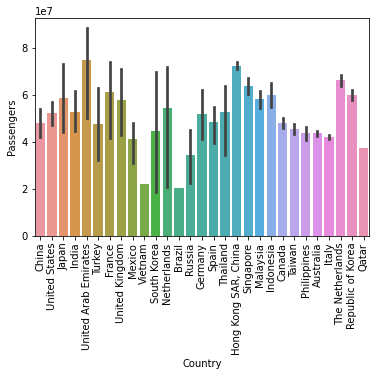

In [15]:
sns.barplot(x="Country",y="Passengers",data=data)
plt.xticks(rotation=90)
plt.show()

In [37]:
passangers_countrys=pd.pivot_table(data,index=["Country"], aggfunc={"Passengers":np.sum})

In [40]:
passangers_countrys.sort_values(by="Passengers",ascending=False)

,Passengers
Country,
United States,3964596952
China,2344913081
Japan,526670590
United Kingdom,518562015
India,474792880
Germany,465158183
Spain,434672131
United Arab Emirates,373342493
France,306041788


# Which year we had the most passangers
*first I showed it visually then I showed it with numbers*

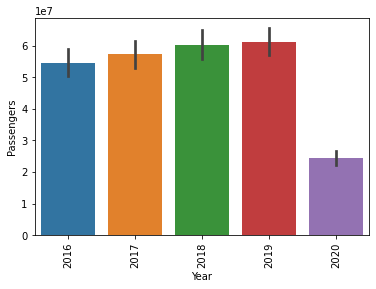

In [16]:
sns.barplot(x="Year",y="Passengers",data=data)
plt.xticks(rotation=90)
plt.show()

In [41]:
passangers_year=pd.pivot_table(data,index=["Year"], aggfunc={"Passengers":np.sum})

In [59]:
pd.pivot_table(data,index=["Year"], aggfunc={"Passengers":np.sum}).sort_values(by="Passengers")

,Passengers
Year,
2020,1223369322
2016,2724498356
2017,2859279173
2018,3008557846
2019,3055838581


# Which year for which country was the best

In [53]:
passangers_year_country=pd.pivot_table(data,index=["Country","Year"], aggfunc={"Passengers":np.sum})

In [54]:
passangers_year_country

Passengers
Country       Year            
Australia     2016    41985810
              2017    43410355
              2018    44475976
              2019    44446838
Brazil        2020    20322520
...                        ...
United States 2017   869980194
              2018   904921387
              2019   934865503
              2020   368767320
Vietnam       2020    21900000

[112 rows x 1 columns]